# EDA on Caffeine Intake Tracker

Tracking whether how caffeine affects sleep and focus level through an analysis

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df=pd.read_csv("caffeine_intake_tracker.csv")
df.head(10)

,caffeine_mg,age,focus_level,sleep_quality,sleep_impacted,beverage_coffee,beverage_energy_drink,beverage_tea,time_of_day_afternoon,time_of_day_evening,time_of_day_morning,gender_female,gender_male
0,0.454545,1.000000,0.715384,0.749790,1,True,False,False,False,True,False,True,False
1,0.286364,0.833333,0.846471,0.730060,0,True,False,False,False,False,True,True,False
2,0.531818,0.476190,0.665639,0.276600,1,False,True,False,False,False,True,False,True
3,0.068182,0.642857,0.751364,0.654003,0,False,False,True,False,False,True,True,False
4,0.409091,0.047619,0.808104,0.709735,1,True,False,False,False,True,False,False,True
5,0.218182,0.309524,0.663912,0.238783,1,True,False,False,False,True,False,True,False
6,0.154545,0.166667,0.903945,0.597395,0,False,False,True,True,False,False,False,True
7,0.422727,0.976190,0.876650,0.585156,1,True,False,False,True,False,False,True,False
8,0.245455,0.714286,0.633410,0.097924,1,True,False,False,False,True,False,True,False
9,0.450000,0.595238,0.724653,0.398525,1,True,False,False,False,True,False,False,True


In [28]:
df.describe()

,caffeine_mg,age,focus_level,sleep_quality,sleep_impacted
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.349464,0.504048,0.825575,0.600212,0.406000
std,0.223971,0.297397,0.167635,0.233145,0.491576
min,0.000000,0.000000,0.216512,0.000000,0.000000
25%,0.177273,0.261905,0.711317,0.414782,0.000000
50%,0.290909,0.500000,0.850635,0.644141,0.000000
75%,0.518182,0.761905,1.000000,0.781867,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   caffeine_mg            500 non-null    float64
 1   age                    500 non-null    float64
 2   focus_level            500 non-null    float64
 3   sleep_quality          500 non-null    float64
 4   sleep_impacted         500 non-null    int64  
 5   beverage_coffee        500 non-null    bool   
 6   beverage_energy_drink  500 non-null    bool   
 7   beverage_tea           500 non-null    bool   
 8   time_of_day_afternoon  500 non-null    bool   
 9   time_of_day_evening    500 non-null    bool   
 10  time_of_day_morning    500 non-null    bool   
 11  gender_female          500 non-null    bool   
 12  gender_male            500 non-null    bool   
dtypes: bool(8), float64(4), int64(1)
memory usage: 23.6 KB


In [30]:
df.isna().sum()

caffeine_mg              0
age                      0
focus_level              0
sleep_quality            0
sleep_impacted           0
beverage_coffee          0
beverage_energy_drink    0
beverage_tea             0
time_of_day_afternoon    0
time_of_day_evening      0
time_of_day_morning      0
gender_female            0
gender_male              0
dtype: int64

### There are no null values present in the dataset

In [31]:
numeric_col = df.select_dtypes(include='float64').columns.tolist()
print(numeric_col)

['caffeine_mg', 'age', 'focus_level', 'sleep_quality']


### Since the dataset already has scaled values in range 0 to 1, we will first check if there exists any value less than 0 or more than 1 

In [32]:
out_of_range = (df[numeric_col] < 0) | (df[numeric_col] > 1)
problem_cells = out_of_range.any(axis=1)
print("Rows with values outside 0‑1 range:", problem_cells.sum())

Rows with values outside 0‑1 range: 0


### This we could also have judged simply by describe() function where max didn't exceed 1 and min didn't fall below 0
### categorical columns can't have outliers. Also the IQR rule for Outilier check is now done like:

In [33]:
for col in numeric_col:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} potential outlier(s)")

caffeine_mg: 0 potential outlier(s)
age: 0 potential outlier(s)
focus_level: 2 potential outlier(s)
sleep_quality: 0 potential outlier(s)


### Since there are only 2/500 outliers or far values, they create no significant change and can be kept as they are

### sleep_impacted is the only column with type 'int' but holds same meaning of a boolean field just with binary values like 0 - as False and 1- as True
### converting it into boolean type for convenience :

In [34]:
df_new=df.copy()
df_new['sleep_impacted'] = df_new['sleep_impacted'].astype(bool)

In [35]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   caffeine_mg            500 non-null    float64
 1   age                    500 non-null    float64
 2   focus_level            500 non-null    float64
 3   sleep_quality          500 non-null    float64
 4   sleep_impacted         500 non-null    bool   
 5   beverage_coffee        500 non-null    bool   
 6   beverage_energy_drink  500 non-null    bool   
 7   beverage_tea           500 non-null    bool   
 8   time_of_day_afternoon  500 non-null    bool   
 9   time_of_day_evening    500 non-null    bool   
 10  time_of_day_morning    500 non-null    bool   
 11  gender_female          500 non-null    bool   
 12  gender_male            500 non-null    bool   
dtypes: bool(9), float64(4)
memory usage: 20.1 KB


### Visualizations

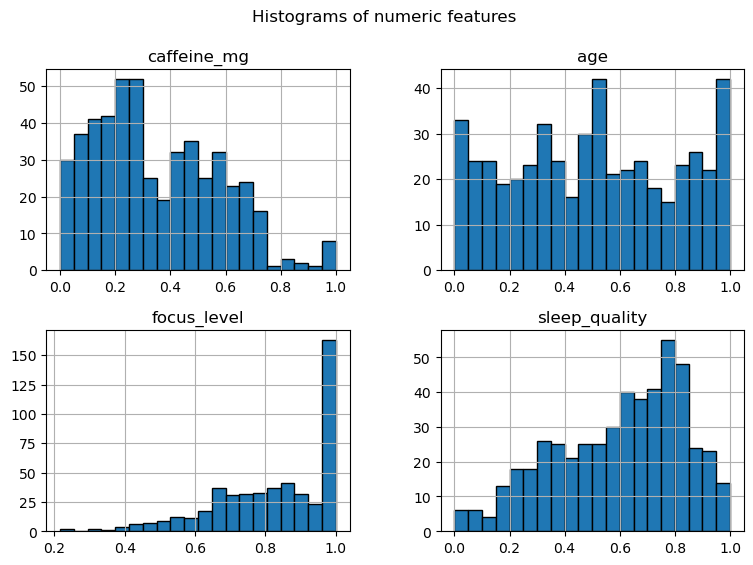

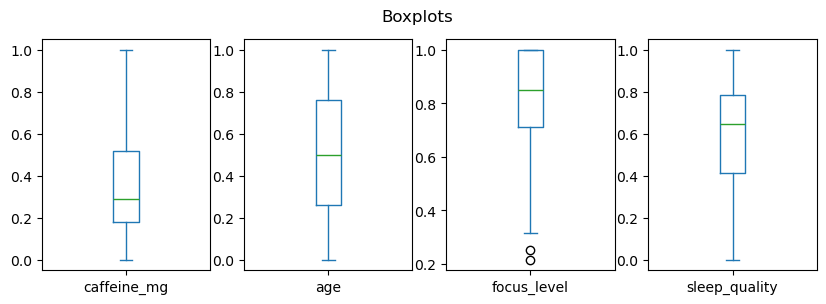

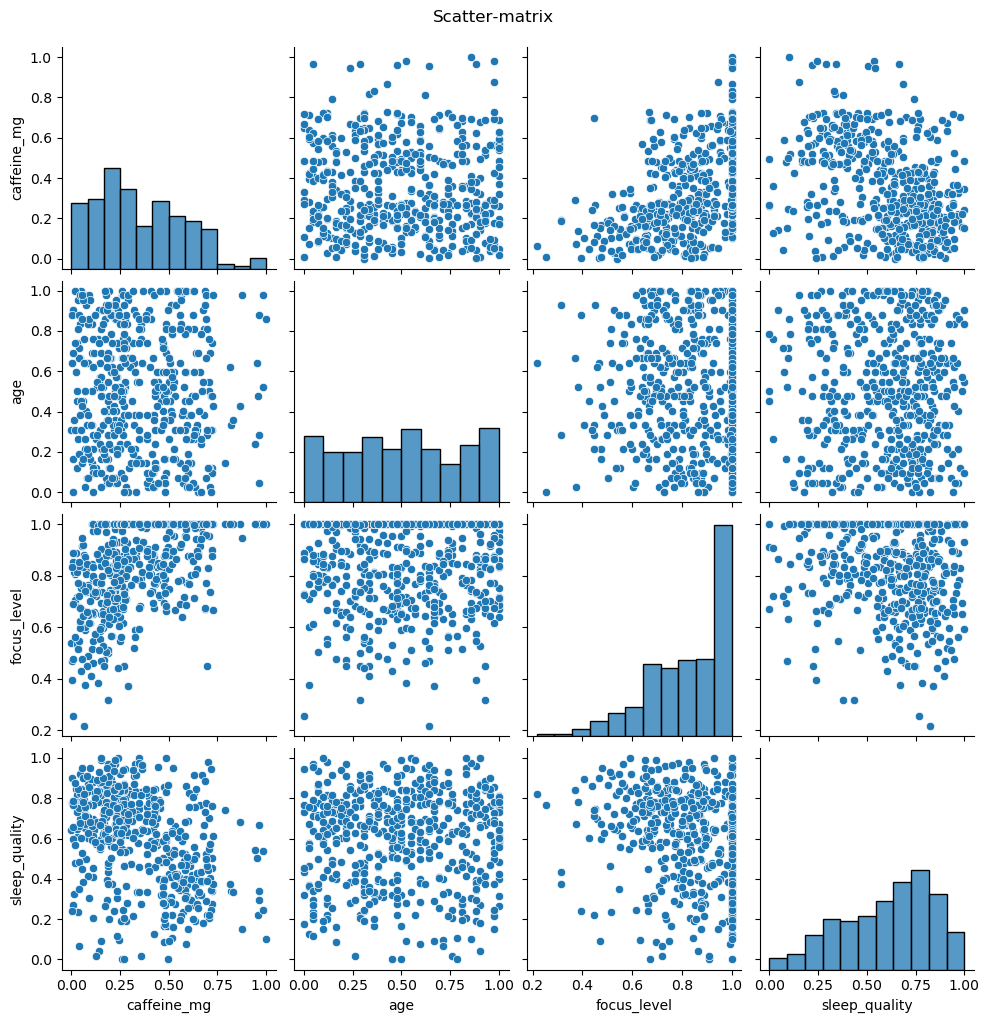

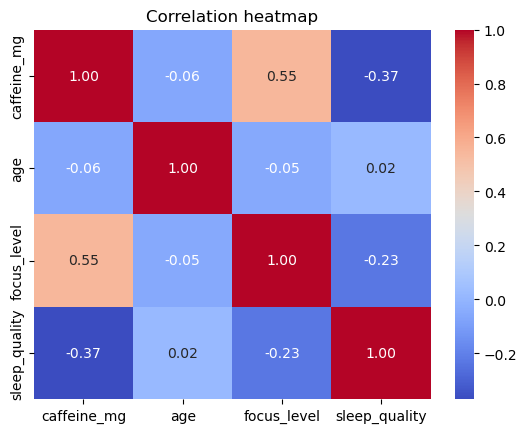

In [47]:
# 1- Distribution/shape by Histograms
df_new[numeric_col].hist(figsize=(9,6), bins=20, edgecolor='black')
plt.suptitle("Histograms of numeric features")
plt.show()

# 2- Spot outliers by Boxplots
df_new[numeric_col].plot(kind='box', subplots=True, layout=(1,4), figsize=(10,3))
plt.suptitle("Boxplots")
plt.show()

# 3‑ Numeric‑vs‑numeric relationships through Pairwise scatter
sns.pairplot(df_new[numeric_col], diag_kind='hist')
plt.suptitle("Scatter‑matrix", y=1.02)
plt.show()

# 4‑ Correlation heatmap
corr = df_new[numeric_col].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

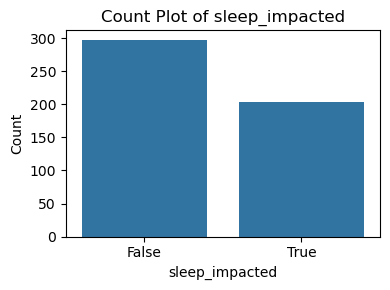

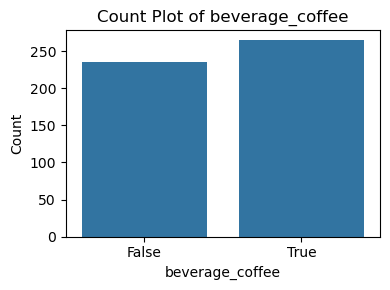

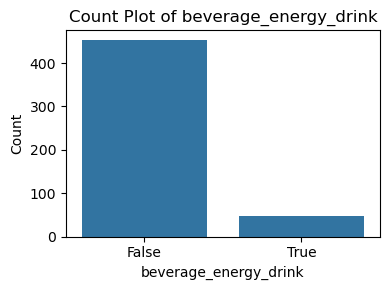

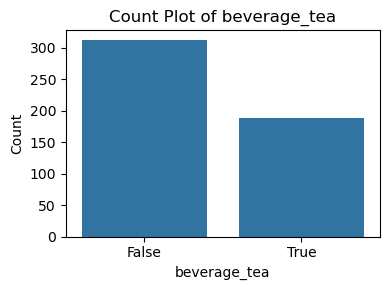

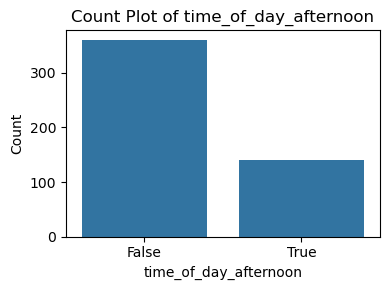

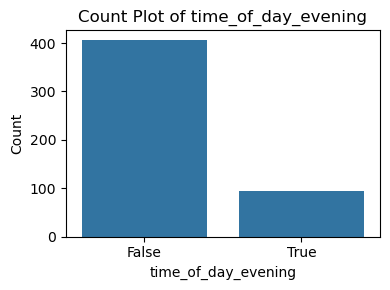

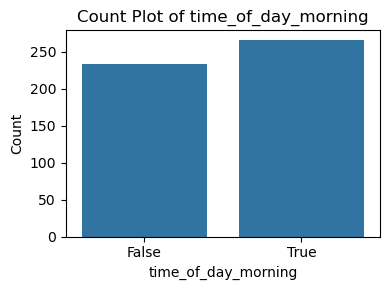

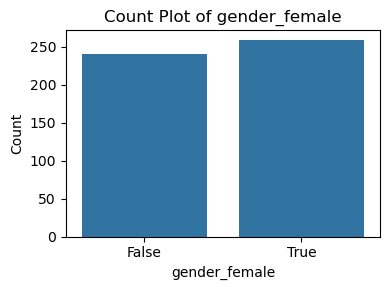

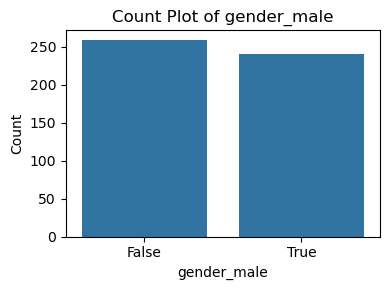

In [50]:
bool_cols = [c for c in df_new.columns if df_new[c].dtype == 'bool']

for col in bool_cols:
    plt.figure(figsize=(4, 3))
    sns.countplot(x=df_new[col])
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

## Findings of EDA:

1. The dataset covers the participation of almost all ages
2. High or extreme caffeine consumption frequency is too low
3. Majority reports high (100%) focus level
4. The majority reports good sleep quality but less people are reporting for best sleep quality
5. For the majority, caffeine didn't impact their sleep
6. People preferring coffee as a beverage are maximum, which tells that coffee is in high demand
7. Very few or negligible no. of people were found to prefer energy drinks
8. People taking tea are fewer than those not taking
9. There is very little consumption of caffeine at the afternoon and evening, but more in the morning.
10. Females are consuming more caffeine than males.